# Task 1: Data Preprocessing

## Importing necessary packages and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder


In [2]:
data = pd.read_csv('C:/Users/nida5/.vscode/Elevate-Labs-Task-1/Titanic-Dataset.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Exploring basic Info

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We have found null values in 'Age','Cabin' and 'Embarked' columns. 

In [4]:
number_of_unique_names = len(data['Name'].unique())
number_of_unique_passengers = len(data['PassengerId'].unique())
number_of_unique_tickets = len(data['Ticket'].unique())
print('Number of Unique Names =', number_of_unique_names)
print('Number of Unique Passengers =', number_of_unique_passengers)
print('Number of Unique Tickets =', number_of_unique_tickets)

Number of Unique Names = 891
Number of Unique Passengers = 891
Number of Unique Tickets = 681


Out of 891 rows, there are 891 passengers (names and passenger id) and 681 unique tickets. We cannot get useful information from these values. So, we can drop thes columns for further analysis.

In [5]:
data.drop(['PassengerId', 'Name', 'Ticket'], 
          axis=1,
          inplace=True)

## Imputing missing values with mean value

The missing values are found in the columns 'Age', 'Cabin','Embarked'. Out of these, 2 columns are categorical columns. So we impute the missing values in Age with its mean, values in Embarked column with mode and those in cabin with 'Unknown'. 

In [6]:
data['Age'] = data['Age'].fillna(data['Age'].mean())
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])
data['Cabin'] = data['Cabin'].fillna('Unknown')


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     891 non-null    object 
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [8]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,Unknown,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,Unknown,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,Unknown,S


## Convert categorical features into numerical using encoding

In [9]:

encoder = OneHotEncoder(sparse_output=False,    
                        handle_unknown='ignore')

# Fit and transform
encoded_array = encoder.fit_transform(data[['Sex', 'Embarked', 'Cabin']])

# Create encoded DataFrame
encoded_df = pd.DataFrame(
    encoded_array,
    columns=encoder.get_feature_names_out(['Sex', 'Embarked', 'Cabin'])
)

# Drop original columns and replace with encoded
data.drop(['Sex', 'Embarked', 'Cabin'], axis=1, inplace=True)
data = pd.concat([data, encoded_df], axis=1)
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,...,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Cabin_Unknown
0,0,3,22.0,1,0,7.2500,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,1,38.0,1,0,71.2833,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,3,26.0,0,0,7.9250,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,1,35.0,1,0,53.1000,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,3,35.0,0,0,8.0500,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [10]:
data.dtypes

Survived           int64
Pclass             int64
Age              float64
SibSp              int64
Parch              int64
                  ...   
Cabin_F38        float64
Cabin_F4         float64
Cabin_G6         float64
Cabin_T          float64
Cabin_Unknown    float64
Length: 159, dtype: object

All the categorical variables are encoded using OneHot Vector Encoding into numerical values

## Normalizing the values

The values are normalized to range0 to 1 using MinMax Scaler

In [11]:

# Select numerical columns
col = ['Age', 'Fare']

# Initialize the scaler
scaler = MinMaxScaler()
# Fit and transform the data
data[col] = scaler.fit_transform(data[col])
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,...,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Cabin_Unknown
0,0,3,0.271174,1,0,0.014151,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,1,0.472229,1,0,0.139136,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,3,0.321438,0,0,0.015469,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,1,0.434531,1,0,0.103644,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,3,0.434531,0,0,0.015713,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Box Plot and Outliers

Creating Box Plot to find the outliers

Text(0.5, 1.0, 'Boxplot of Age and Fare')

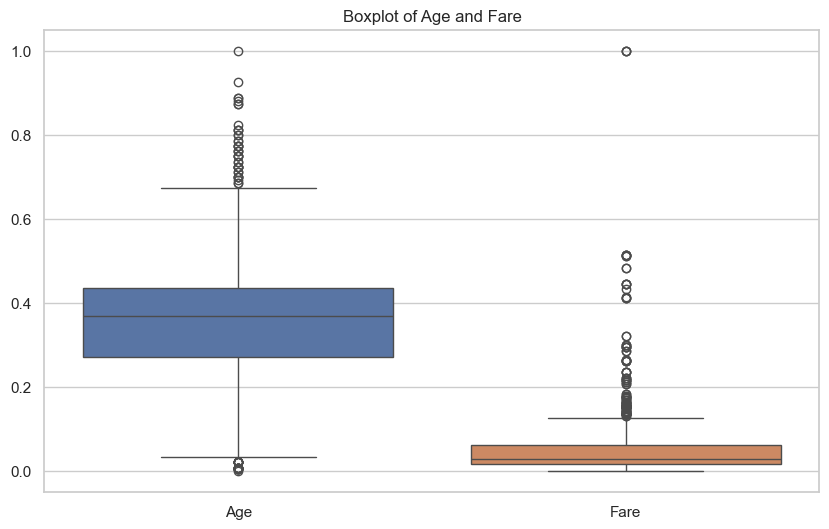

In [12]:
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['Age', 'Fare']])
plt.title('Boxplot of Age and Fare')

There are number of outliers in Age and Fare. We have to remove these outliers

### Using IQR 

In [49]:
Q1_Fare = data['Fare'].quantile(0.25)
Q3_Fare = data['Fare'].quantile(0.75)
IQR_Fare = Q3_Fare - Q1_Fare
lower_bound_Fare = Q1_Fare - 1.5 * IQR_Fare
upper_bound_Fare = Q3_Fare + 1.5 * IQR_Fare
data = data[(data['Fare'] >= lower_bound_Fare) & (data['Fare'] <= upper_bound_Fare)]

In [50]:
Q1_Age = data['Age'].quantile(0.25)
Q3_Age = data['Age'].quantile(0.75)
IQR_Age = Q3_Age - Q1_Age
lower_bound_Age = Q1_Age - 1.5 * IQR_Age
upper_bound_Age = Q3_Age + 1.5 * IQR_Age
data = data[(data['Age'] >= lower_bound_Age) & (data['Age'] <= upper_bound_Age)]


Text(0.5, 1.0, 'Boxplot of Age and Fare')

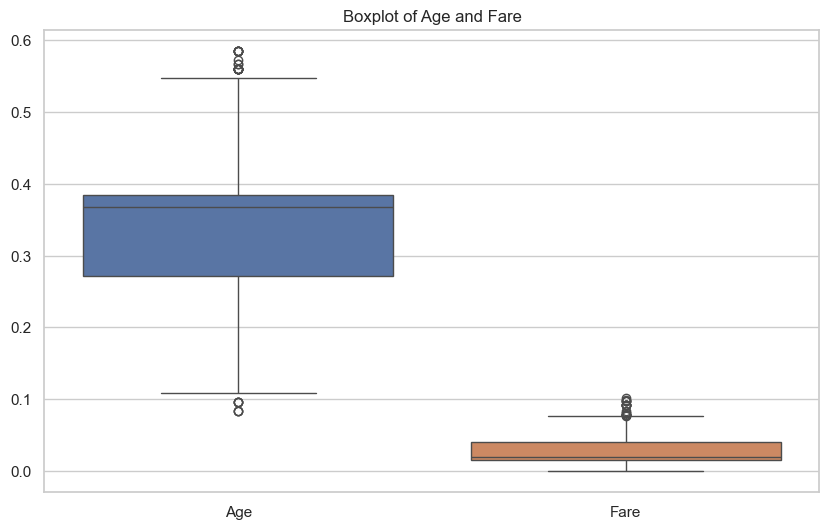

In [51]:
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['Age', 'Fare']])
plt.title('Boxplot of Age and Fare')

We can see that significant number of outliers have been removed from the dataset.

### Using Z-Score

In [52]:
Z_age = (data['Age'] - data['Age'].mean())/ data['Age'].std()
Z_Fare = (data['Fare'] - data['Fare'].mean())/ data['Fare'].std()
data = data[(Z_age.abs() < 3) & (Z_Fare.abs() < 3)]

Text(0.5, 1.0, 'Boxplot of Age and Fare')

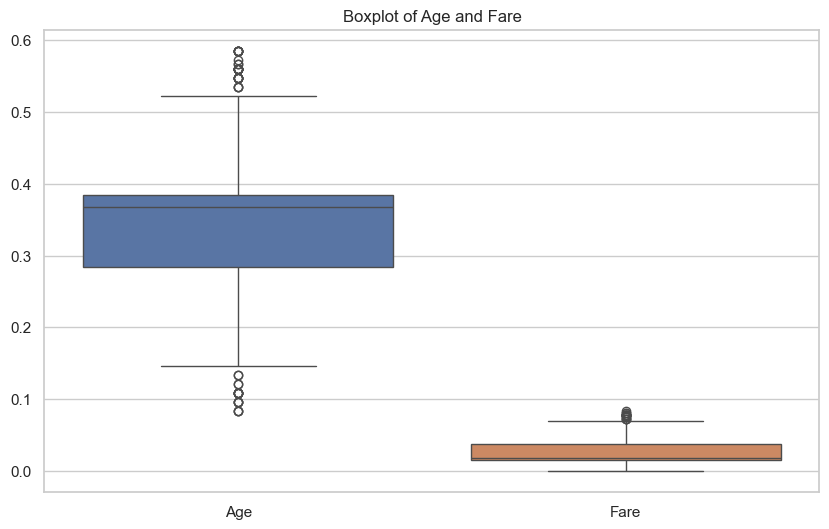

In [53]:
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['Age', 'Fare']])
plt.title('Boxplot of Age and Fare')

We can see IQR method better detect and remove outliers from the dataset.